### mnist 파이토치 예제

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [6]:
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
print(training_data[0][0].shape, len(training_data))
print(test_data[0][0].shape, len(test_data))

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000


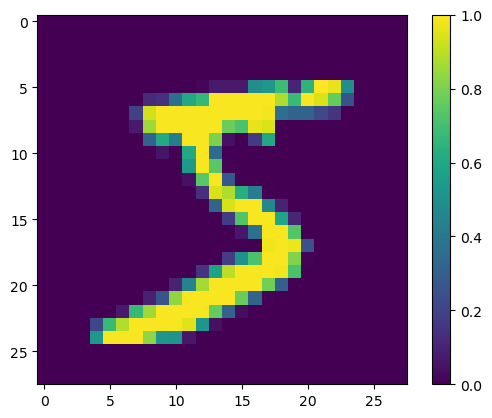

In [5]:
plt.figure()
plt.imshow(training_data[0][0].squeeze())
plt.colorbar()
plt.grid(False)
plt.show()




In [7]:
batch_size = 64

# 데이터 로더를 생성합니다
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(X.shape)
    print(y.shape, y.dtype)
    break


torch.Size([64, 1, 28, 28])
torch.Size([64]) torch.int64


In [9]:
# 학습에 사용할 cpu나 gpu 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using{device}device")

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

model = model.to(device)

print(model)

Usingcpudevice
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)